In [1]:
import pandas as pd
date=pd.read_excel('./题目二数据.xlsx', sheet_name='题7',header=4)
print(date)

          地区    2021年    2020年    2019年    2018年    2017年    2016年
0        北京市  32889.6  30095.9  29663.4  27508.1  24711.7  22245.7
1        天津市   9615.4   8885.9   8922.9   8352.3   7717.5   6940.8
2        河北省  19996.7  18368.4  18066.4  16252.0  14732.8  13059.3
3        山西省  10090.2   8965.8   8670.0   8142.9   7129.8   6108.5
4     内蒙古自治区   8914.8   8321.1   8586.1   8054.7   7374.0   6558.9
5        辽宁省  14247.1  13369.1  13201.4  12441.0  11461.8  10685.6
6        吉林省   6913.4   6383.1   6304.7   6041.6   5831.2   5395.5
7       黑龙江省   7440.9   6738.5   6721.1   6309.3   5828.2   5454.0
8        上海市  31665.6  28597.1  27686.9  25546.3  23288.3  21202.4
9        江苏省  59866.4  53638.9  50852.1  46936.5  42700.5  38269.6
10       浙江省  40118.1  36161.3  34075.8  30718.8  27222.5  23792.4
11       安徽省  21985.4  19660.1  18959.5  17278.5  14412.7  12300.5
12       福建省  23046.3  20709.3  19665.6  17461.0  15337.3  12780.6
13       江西省  14102.2  12430.2  11789.3  10758.0   8930.9   78

In [2]:
import numpy as np
# 转换数组
date=np.array(date)
date=np.delete(date,0,axis=1)

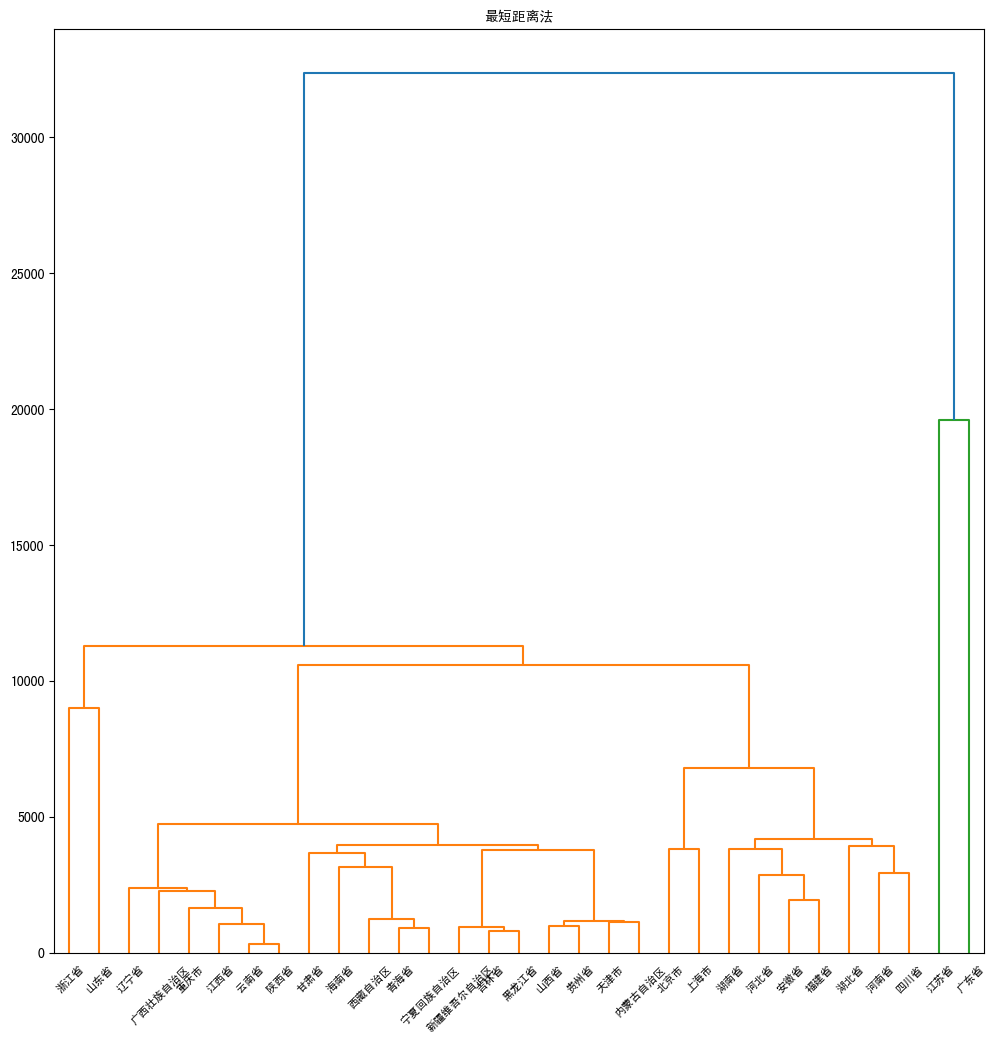

In [3]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
from pylab import mpl
mpl.rcParams["font.sans-serif"] = ["SimHei"]
dateA=pd.read_excel('./题目二数据.xlsx', sheet_name='题7',header=4)
Z = linkage(date, 'single') #最短距离法
fig = plt.figure(figsize=(12, 12))
plt.title("最短距离法", fontsize=10)
label=np.array(dateA['地区'])
dn = dendrogram(Z,labels=label)
plt.show()

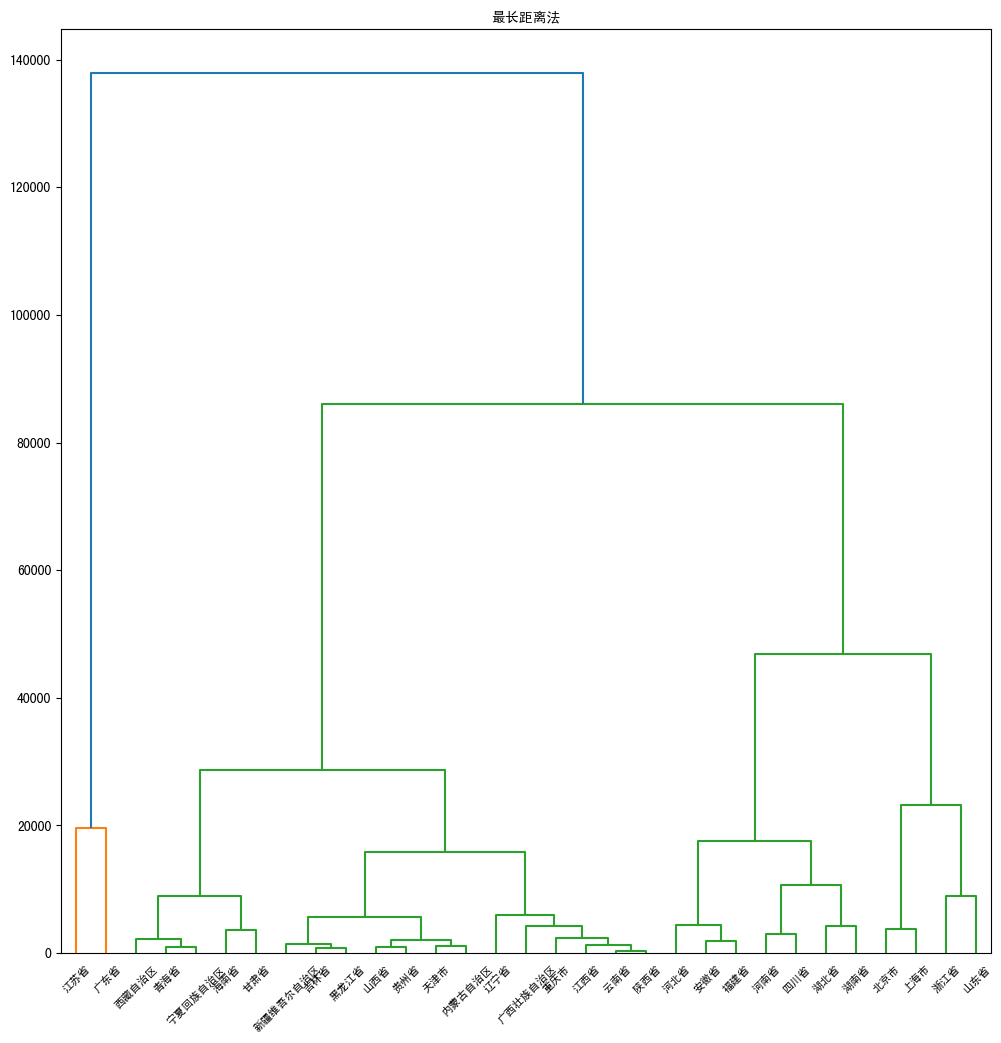

In [4]:
Z = linkage(date, 'complete') #最长距离法
fig = plt.figure(figsize=(12, 12))
plt.title("最长距离法", fontsize=10)
dn = dendrogram(Z,labels=label)
plt.show()

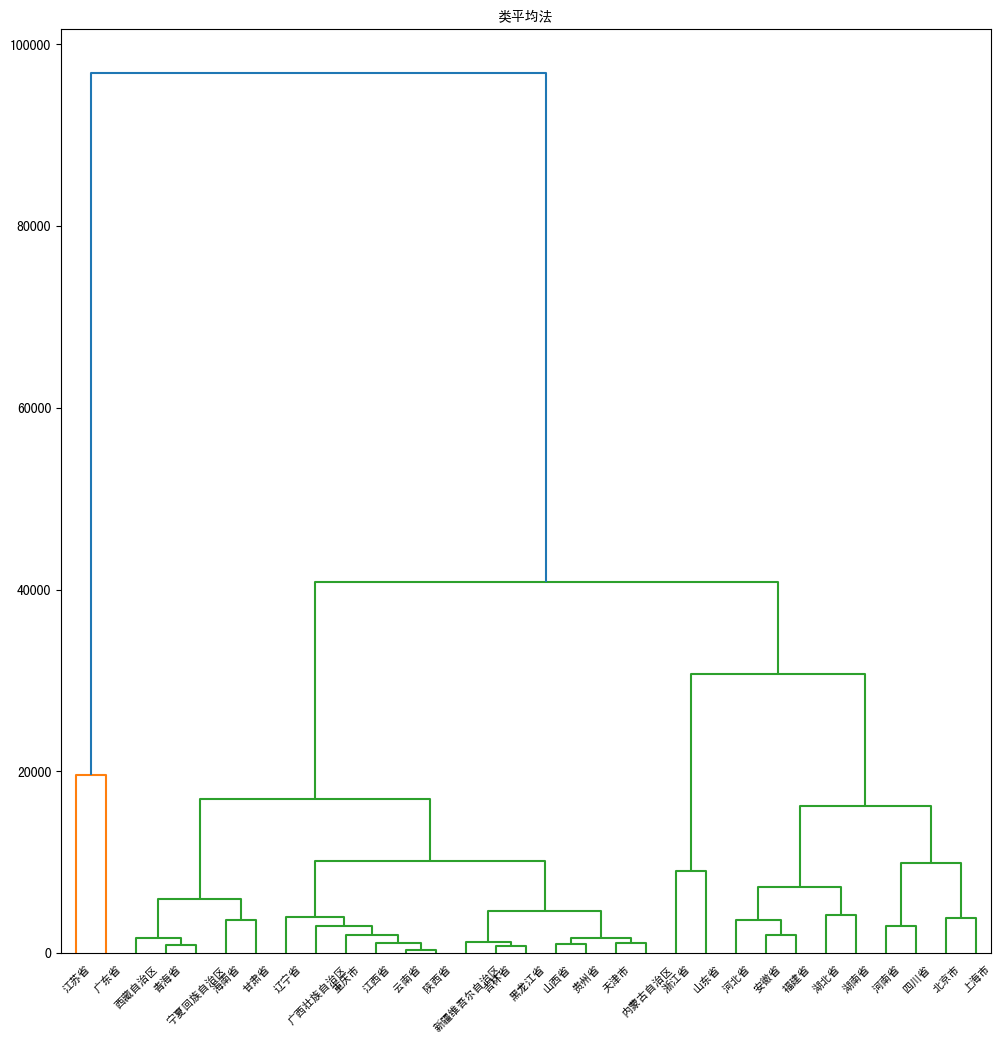

In [5]:
Z = linkage(date, 'average') #类平均法
fig = plt.figure(figsize=(12, 12))
plt.title("类平均法", fontsize=10)
dn = dendrogram(Z,labels=label)
plt.show()

In [6]:
from sklearn.cluster import KMeans
region=KMeans(n_clusters=4,n_init="auto")
region.fit(date)
label=region.labels_ #获得聚类标签
center=region.cluster_centers_ #聚类中心
print(label)

[1 3 3 3 3 3 0 0 1 2 1 3 1 3 1 1 1 1 2 3 0 3 1 3 3 0 3 0 0 0 0]


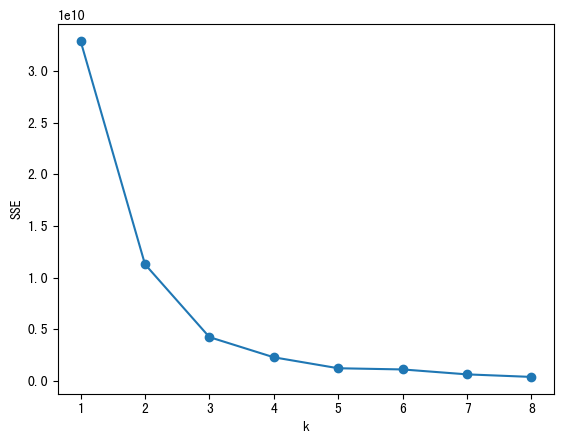

In [7]:
import matplotlib.pyplot as plt
SSE = []  # 存放每次结果的误差平方和
for k in range(1,9):
    estimator = KMeans(n_clusters=k,n_init="auto")  # 构造聚类器
    estimator.fit(date)
    SSE.append(estimator.inertia_)
X = range(1,9)
plt.xlabel('k')
plt.ylabel('SSE')
plt.plot(X,SSE,'o-')
plt.show()

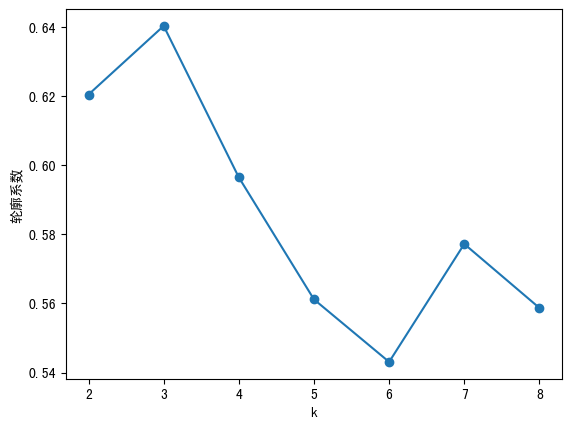

In [8]:
from sklearn.metrics import silhouette_score
Scores = []  # 存放轮廓系数
for k in range(2,9):
    estimator = KMeans(n_clusters=k,n_init="auto")  # 构造聚类器
    estimator.fit(date)
    Scores.append(silhouette_score(date,estimator.labels_,metric='euclidean'))
X = range(2,9)
plt.xlabel('k')
plt.ylabel('轮廓系数')
plt.plot(X,Scores,'o-')
plt.show()